# Auswertung

# Latex Rendering

In [19]:
# latex rendering
import matplotlib.pyplot as plt 

# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"


In [1]:
import plot_functions as p_func
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

c_scheme = p_func.c_scheme_02()

In [2]:
# load file

# dentists = pd.read_csv("Data/DLS/DLS-Data_Gruppe2.csv").dropna(how='all', axis=1)
STO_2p5 = pd.read_csv("data_to_start/STO_4-5_532nm_500cm-1_2p5mW_3x200s_XX_100xlong.txt", sep="\t")

# STO_2p5.wavenumber

STO_2p5.wavenumber
STO_2p5.counts

0       1.2300
1       1.4050
2       1.6700
3       1.8925
4       2.0050
         ...  
1019    0.9575
1020    0.9575
1021    0.8625
1022    0.8350
1023    0.7725
Name: counts, Length: 1024, dtype: float64

# primitive plot

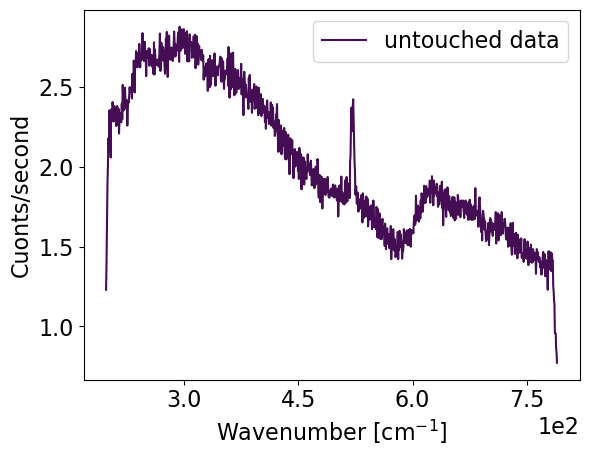

In [3]:
default_data = [
    [STO_2p5.wavenumber, STO_2p5.counts, "untouched data", c_scheme[0], "-", ""]
]

p_func.plot_with_one_axis(default_data, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5) # [data_x, data_y, label, colorr, line_style, marker_type]


# select x range e.g cut off edges

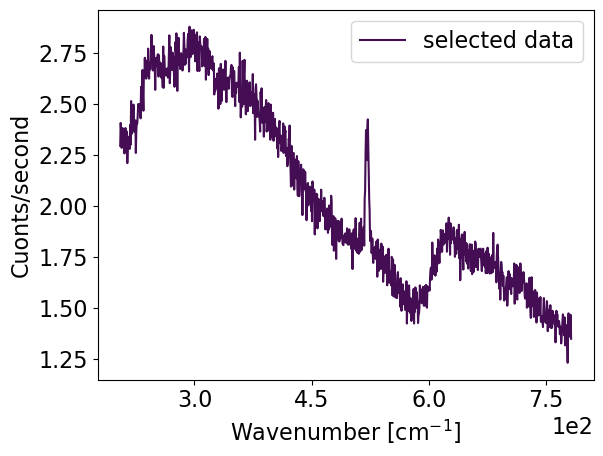

In [4]:
# cut of "from" "to"
von = 13
zu = 1010

cropped_default_data = [
    [STO_2p5.wavenumber[von:zu], STO_2p5.counts[von:zu], "selected data", c_scheme[0], "-", ""]
]

p_func.plot_with_one_axis(cropped_default_data, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5) # [data_x, data_y, label, colorr, line_style, marker_type]


# get third point for arabola

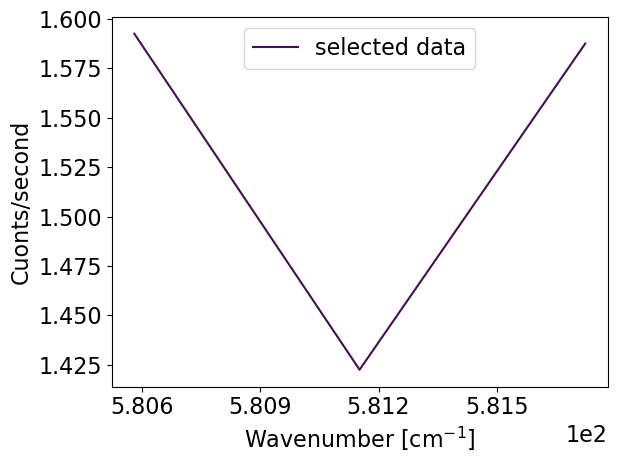

In [5]:
# cut of "from" "to"
von = 13
zu = 1010

vonnn = 650
zuuu = 653

cropped_default_data = [
    [STO_2p5.wavenumber[vonnn:zuuu], STO_2p5.counts[vonnn:zuuu], "selected data", c_scheme[0], "-", ""]
]

p_func.plot_with_one_axis(cropped_default_data, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5) # [data_x, data_y, label, colorr, line_style, marker_type]

# STO_2p5.counts[651]
STO_2p5.wavenumber[651]

p2 = (581.152, 1.4225)



# add baseline

In [6]:
# identify smallest and biggest wavenumber

mittlerer_punkt = 651

p1 = (STO_2p5.wavenumber[von], STO_2p5.counts[von]) # (204.975, 2.2950)
p2 = (STO_2p5.wavenumber[mittlerer_punkt], STO_2p5.counts[mittlerer_punkt]) # (581.152, 1.4225)
p3 = (STO_2p5.wavenumber[zu], STO_2p5.counts[zu]) # (782.224, 1.3475)

# in a numpy array:
x_vals = np.array([STO_2p5.wavenumber[von], STO_2p5.wavenumber[mittlerer_punkt], STO_2p5.wavenumber[zu]])  # Wavenumbers
y_vals = np.array([STO_2p5.counts[von], STO_2p5.counts[mittlerer_punkt], STO_2p5.counts[zu]])     # Counts


def parabola(x,a,b,c):
    return a*x**2 + b*x + c

# Fit the parabola to the given points
popt, pcov = curve_fit(parabola, x_vals, y_vals)

# popt contains the best-fit parameters [a, b, c]
a_fit, b_fit, c_fit = popt


# define for easier usage
y_baseline = parabola(STO_2p5.wavenumber, a_fit, b_fit, c_fit)
counts_baseline_adjusted = STO_2p5.counts - y_baseline

counts_baseline_adjusted

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0      -1.093774
1      -0.916550
2      -0.649322
3      -0.424592
4      -0.309868
          ...   
1019   -0.399361
1020   -0.399578
1021   -0.494797
1022   -0.522518
1023   -0.585241
Length: 1024, dtype: float64

In [7]:
# save in a file

# Beispiel-Arrays
array1 = STO_2p5.wavenumber[von:zu]
array2 = counts_baseline_adjusted[von:zu]


print(array2)

# Kombinieren der Arrays zu einer 2D-Matrix für besseren Text-Export
data = np.column_stack((array1, array2))

# Speichern als Textdatei
np.savetxt("test_data_to_start/meta/prepared_data.txt", data, delimiter="\t", header="Array1\tArray2")

# Laden der Datei
loaded_data = np.loadtxt("test_data_to_start/meta/prepared_data.txt")

print(loaded_data)


13      0.000000
14      0.114698
15      0.074383
16     -0.003424
17      0.058766
          ...   
1005    0.053461
1006    0.003273
1007    0.055583
1008    0.110390
1009   -0.007304
Length: 997, dtype: float64
[[ 2.04975000e+02  0.00000000e+00]
 [ 2.05584000e+02  1.14698107e-01]
 [ 2.06190000e+02  7.43828571e-02]
 ...
 [ 7.81121000e+02  5.55826644e-02]
 [ 7.81673000e+02  1.10390417e-01]
 [ 7.82224000e+02 -7.30356990e-03]]


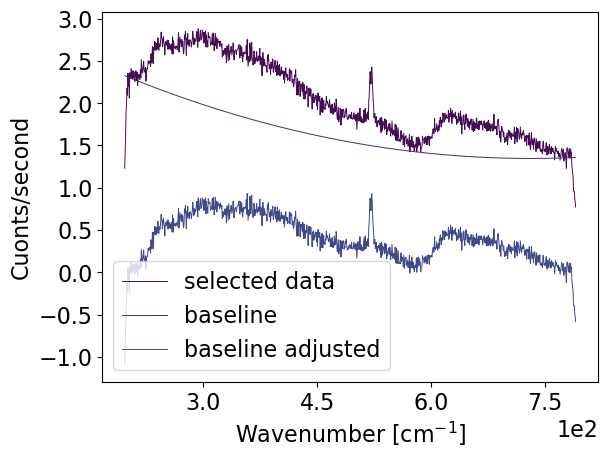

In [8]:
baseline_adjustments = [
    [STO_2p5.wavenumber, STO_2p5.counts, "selected data", c_scheme[0], "-", ""],
    [STO_2p5.wavenumber, y_baseline, "baseline", c_scheme[1], "-", ""],
    [STO_2p5.wavenumber, counts_baseline_adjusted, "baseline adjusted", c_scheme[2], "-", ""],
    # [array1, array2, "array1,2", c_scheme[3], "-", ""],

]

p_func.plot_with_one_axis(baseline_adjustments, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, line_width=0.7) # [data_x, data_y, label, colorr, line_style, marker_type]



# try fit one lorentzian

In [9]:
# find selection for lorentzian fit

lorentzian_left = 520
lorentzian_right = 574

In [10]:
def lorentzian(x, A, x0, gamma):
    return A / (1 + ((x - x0) / gamma) ** 2)

# Provide initial guesses for [A, x0, gamma]
A_guess = max(counts_baseline_adjusted[lorentzian_left:lorentzian_right])
x0_guess = STO_2p5.wavenumber[lorentzian_left:lorentzian_right].iloc[np.argmax(counts_baseline_adjusted[lorentzian_left:lorentzian_right])]
gamma_guess = (max(STO_2p5.wavenumber[lorentzian_left:lorentzian_right]) - min(STO_2p5.wavenumber[lorentzian_left:lorentzian_right])) / 100

p0 = [A_guess, x0_guess, gamma_guess] # Initial parameter guess
popt, pcov = curve_fit(lorentzian, STO_2p5.wavenumber[lorentzian_left:lorentzian_right], counts_baseline_adjusted[lorentzian_left:lorentzian_right], p0=p0) # Perform the curve fitting
A_fit, x0_fit, gamma_fit = popt # Extract best-fit parameters


# Generate smooth fitted curve
lorentzian_test_x_fit = np.linspace(min(STO_2p5.wavenumber[lorentzian_left:lorentzian_right]), max(STO_2p5.wavenumber[lorentzian_left:lorentzian_right]), 1000)
lorentzian_test_y_fit = lorentzian(lorentzian_test_x_fit, *popt)

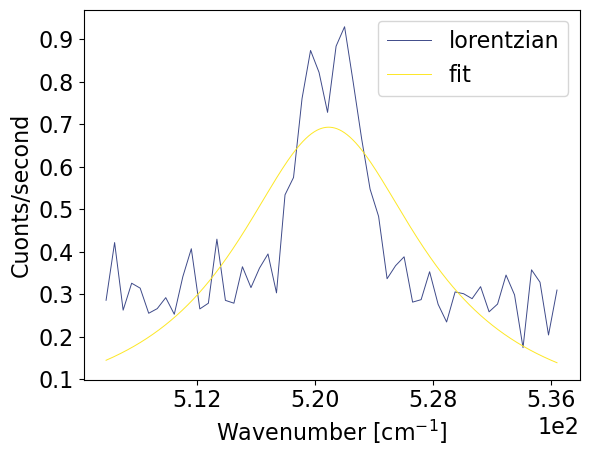

In [11]:
for_lorentzuan = [
    # [STO_2p5.wavenumber, counts_baseline_adjusted, "baseline adjusted", c_scheme[2], "-", ""],
    [STO_2p5.wavenumber[lorentzian_left:lorentzian_right], counts_baseline_adjusted[lorentzian_left:lorentzian_right], "lorentzian", c_scheme[2], "-", ""],
    [lorentzian_test_x_fit, lorentzian_test_y_fit, "fit", c_scheme[9], "-", ""],
]

p_func.plot_with_one_axis(for_lorentzuan, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, line_width=0.7) # [data_x, data_y, label, colorr, line_style, marker_type]

# summary of the above

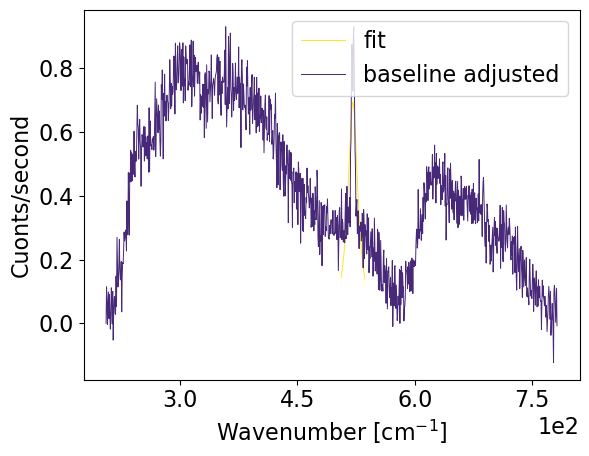

In [12]:
summary = [
    [lorentzian_test_x_fit, lorentzian_test_y_fit, "fit", c_scheme[9], "-", ""],
    [STO_2p5.wavenumber[von:zu], counts_baseline_adjusted[von:zu], "baseline adjusted", c_scheme[1], "-", ""],
]

p_func.plot_with_one_axis(summary, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, line_width=0.7) # [data_x, data_y, label, colorr, line_style, marker_type]

# assign peaks

In [13]:
# # normalize_data
# counts_baseline_adjusted[von:zu]



# STO_2p5.wavenumber[von:zu], 
# counts_baseline_adjusted[von:zu]

In [14]:
from scipy.signal import find_peaks
import scipy

distances = np.linspace(12,98, 10)
height = np.linspace(0.2,0.9, 10)

peaks,properties = find_peaks(counts_baseline_adjusted[von:zu], height=0.35, distance=50)   

print(peaks, properties)

[ 66 119 181 255 312 363 413 477 535 716 817 879] {'peak_heights': array([0.68396291, 0.7945263 , 0.88810447, 0.93003107, 0.77992407,
       0.72169371, 0.5058715 , 0.39018254, 0.92969581, 0.5588494 ,
       0.51385858, 0.37119725])}


In [15]:
def get_peaks(xs, ys, widths=np.arange(1,50, 0.5)):
    # Not perfect but seems to find the most obscure ones, I use this one
    peaks = scipy.signal.find_peaks_cwt(ys, widths)#Problem
    # pyplot.plot(xs[peaks], ys[peaks], marker='+', linestyle='', markersize='12')
    print('*************PEAKSCIPY**************')
    print('Peak_pos= ', peaks, '\nPeaks= ', xs.iloc[peaks], '\nIntensities= ',ys.iloc[peaks])
    print('*************PEAKSCIPY**************')

    return peaks 

pp = get_peaks(STO_2p5.wavenumber[von:zu], counts_baseline_adjusted[von:zu])



*************PEAKSCIPY**************
Peak_pos=  [ 64 352 435 534 701 824 993] 
Peaks=  77      243.767
365     415.395
448     463.974
547     521.411
714     617.049
837     686.499
1006    780.569
Name: wavenumber, dtype: float64 
Intensities=  77      0.512427
365     0.702845
448     0.407460
547     0.883869
714     0.384951
837     0.272605
1006    0.003273
dtype: float64
*************PEAKSCIPY**************


In [16]:
# lorentzian

def lorentzian(x, A, x0, gamma):
    return A / (1 + ((x - x0) / gamma) ** 2)

# def lorentzian(x, amp, ctr, wid):
#     return amp*wid**2/((x-ctr)**2+wid**2)

def func(x, *params):
    ''' *params of the form [center, amplitude, width ...] '''
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        x0 = params[i]
        A = params[i+1]
        gamma = params[i+2]

        y = y + lorentzian(x, A, x0, gamma)
    return y

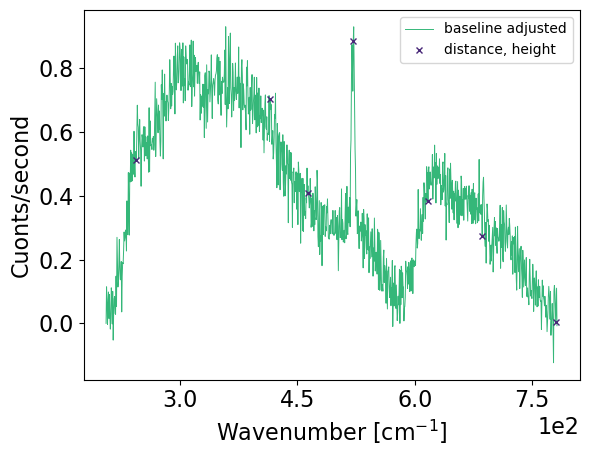

In [17]:
data_with_peaks = [
    [STO_2p5.wavenumber[von:zu], counts_baseline_adjusted[von:zu], "baseline adjusted", c_scheme[6], "-", ""],
    # [STO_2p5.wavenumber[von:zu].iloc[peaks], counts_baseline_adjusted[von:zu][peaks], f"distance {d}, height {h}", c_scheme[1], "", "x"],
    [STO_2p5.wavenumber[von:zu].iloc[pp], counts_baseline_adjusted[von:zu].iloc[pp], f"distance, height", c_scheme[1], "", "x"],
]

p_func.plot_with_one_axis(data_with_peaks, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=10, x_ticks_limit=5, line_width=0.7) # [data_x, data_y, label, colorr, line_style, marker_type]

# make guess

In [18]:
guess = []
for x_val, y_val in zip(STO_2p5.wavenumber[von:zu].iloc[pp], counts_baseline_adjusted[von:zu].iloc[pp]):
    guess.append(x_val)    # center
    guess.append(y_val)    # amplitude
    guess.append(10)       # width (can be tuned or estimated)


print(guess)

[243.767, 0.5124271860862515, 10, 415.395, 0.7028448189065917, 10, 463.974, 0.40746023397890285, 10, 521.411, 0.8838688284745881, 10, 617.049, 0.3849513668963416, 10, 686.499, 0.27260522106005136, 10, 780.569, 0.0032728188228730026, 10]


# Try code from internet

R-squared: 0.9000


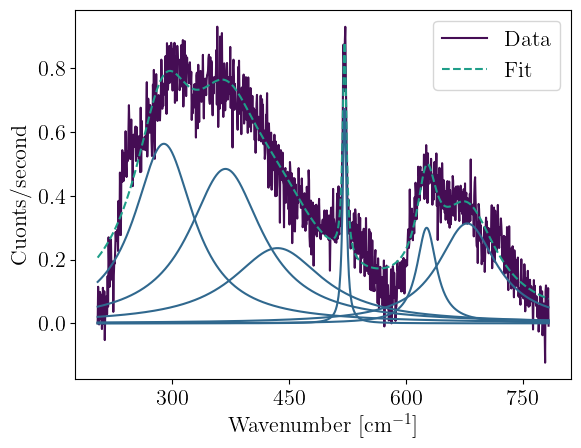

In [24]:
import glob, os
import numpy as np
import csv
from matplotlib import pyplot
import scipy.signal
from scipy.optimize import curve_fit
import peakutils
from lmfit.models import PseudoVoigtModel
import math
import traceback
from collections import OrderedDict 

path_to_folder = "test_data_to_start"
samples_to_analyse = ["meta copy"]

def import_data(samples_to_analyse, path_to_folder=path_to_folder):
    dict_container = OrderedDict()
    for sample_id in samples_to_analyse:
        dict_container[sample_id] = []

    for sample_id in samples_to_analyse:
        path = os.path.join(path_to_folder, sample_id, "*.txt")  # Use os.path.join
        file_list = glob.glob(path)  # Get the list of matching files

        if not file_list:
            print(f"Warning: No files found for sample {sample_id} in {path}")

        for filepath in file_list:
            try:
                data_from_file = np.genfromtxt(filepath)
                dict_container[sample_id].append(data_from_file)
            except Exception as e:
                print(f"Error loading file {filepath}: {e}")

    return dict_container

def lorentzian(x, amp, ctr, wid):
    return amp*wid**2/((x-ctr)**2+wid**2)

def func(x, *params):
    ''' *params of the form [center, amplitude, width ...] '''
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        # y = y + amp * np.exp( -((x - ctr)/wid)**2)
        y = y + lorentzian(x, amp, ctr, wid)
    return y

def fit_lorentzians(guess, func, x, y):
    # Uses scipy curve_fit to optimise the lorentzian fitting
    sigma = [2] * len(y)
    popt, pcov = curve_fit(func, x, y, p0=guess, maxfev=5000000, sigma=sigma)
    # print('popt:', popt)
    fit = func(x, *popt)
    # pyplot.plot(x, y)
    # pyplot.plot(x, fit , 'r-')
    return (popt, fit)
    # pyplot.show()

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def find_peaks_scipy(xs, ys, widths=np.arange(1,50, 0.5)):
    # Not perfect but seems to find the most obscure ones, I use this one
    peaks = scipy.signal.find_peaks_cwt(ys, widths)#Problem
    # pyplot.plot(xs[peaks], ys[peaks], marker='+', linestyle='', markersize='12')
    # print('*************PEAKSCIPY**************')
    # print('From scipy: \nPeak_pos= ', peaks, '\nPeaks= ', xs[peaks], '\nIntensities= ',ys[peaks])
    # print('************************************')
    return peaks 

def get_highest_n_from_list(a, n):
    # Returns the highest peaks found by the peak finding algorithms
    return sorted(a, key=lambda pair: pair[1])[-n:]

def get_highest_n_peaks_scipy(xs, ys, n, th=0.25):
    smooth_indexes_scipy = find_peaks_scipy(xs, ys)
    ##take the highest 'n' smooth peaks 
    peak_indexes_xs_ys = np.asarray([list(a) for a in list(zip(xs[smooth_indexes_scipy], ys[smooth_indexes_scipy]))])
    return get_highest_n_from_list(peak_indexes_xs_ys, n)

def predict_and_plot_lorentzians(xs, ys, n_peaks_to_find=5):
    n_peaks = np.asarray(get_highest_n_peaks_scipy(xs, ys, n_peaks_to_find))

    # pyplot.plot(n_peaks[:,0], n_peaks[:,1], ls='', marker='x', markersize=10) ##This is plotting the peak positions, the xs
    # pyplot.ylabel("Counts")
    # pyplot.xlabel("Raman Shift/ Wavenumber ($cm^{-1}$)")

    # print("n_peaks", n_peaks)
    guess = []

    for idx, xs_ys in enumerate(n_peaks):
        guess.append(xs_ys[0]) #ctr
        guess.append(xs_ys[1]) #amp
        guess.append(10) #width ###This could be improved by estimating the width first for a better fit
    # print('Fit Guess: ', guess)
    # guess.append(500); guess.append(0.25); guess.append(500) #Broad lorenztian

    
    params, fit = fit_lorentzians(guess, func, xs, ys) ###params is the array of gaussian stuff, fit is the y's of lorentzians

    return (params, fit, ys, n_peaks)


def r_value(ys, ys_fit):
    # Calculate the residuals
    residuals = ys - ys_fit

    # Calculate the total sum of squares (SST)
    sst = np.sum((ys - np.mean(ys))**2)

    # Calculate the residual sum of squares (SSR)
    ssr = np.sum(residuals**2)

    # Calculate R-squared
    r_squared = 1 - (ssr / sst)

    print(f"R-squared: {r_squared:.4f}")


def linus_main_predict_fit(xs, ys):
    # pyplot.title("B" + " Raman Scattering - #" )

    params, fit, ys, n_peaks = predict_and_plot_lorentzians(xs,ys, 6) # 5 = number of peaks to fit to ##Returns modified ys for y axis scaling

    data_with_lorentzians = []

    data_with_lorentzians.append([xs, ys, "Data", c_scheme[0], "-", ""])
    data_with_lorentzians.append([xs, fit, "Fit", c_scheme[5], "--", ""])

    for j in range(0, len(params), 3): 
        ctr = params[j] 
        amp = params[j+1]
        width = params[j+2]
        # pyplot.plot(xs, lorentzian(xs, amp, ctr, width), ls='-')

        data_with_lorentzians.append([xs, lorentzian(xs, amp, ctr, width), "", c_scheme[3], "-", ""])

    return data_with_lorentzians, fit




if __name__ == "__main__":
    ddd, f = linus_main_predict_fit(STO_2p5.wavenumber[von:zu], counts_baseline_adjusted[von:zu])

    r_value(counts_baseline_adjusted[von:zu], f)


    p_func.plot_with_one_axis(ddd, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Cuonts/second", plot_title="", filename_to_save="Figures/test_fitted_spectrum", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain", line_width=1.5) # [data_x, data_y, label, colorr, line_style, marker_type] 



*************PEAKSCIPY**************
From scipy: 
Peak_pos=  [ 64 352 435 534 701 824 993] 
Peaks=  [243.767 415.395 463.974 521.411 617.049 686.499 780.569] 
Intensities=  [0.51242719 0.70284482 0.40746023 0.88386883 0.38495137 0.27260522
 0.00327282]
************************************
[[6.86499000e+02 2.72605221e-01]
 [6.17049000e+02 3.84951367e-01]
 [4.63974000e+02 4.07460234e-01]
 [2.43767000e+02 5.12427186e-01]
 [4.15395000e+02 7.02844819e-01]
 [5.21411000e+02 8.83868828e-01]]
Fit Guess:  [686.499, 0.27260522106005136, 10, 617.049, 0.3849513668963416, 10, 463.974, 0.40746023397890285, 10, 243.767, 0.5124271860862515, 10, 415.395, 0.7028448189065917, 10, 521.411, 0.8838688284745881, 10]
popt: [6.78023681e+02 3.13334309e-01 4.55686826e+01 6.26162857e+02
 2.99575684e-01 1.53597782e+01 4.35184222e+02 2.36215536e-01
 7.09665540e+01 2.89727793e+02 5.62909581e-01 4.64098236e+01
 3.68569780e+02 4.83878730e-01 5.69163880e+01 5.21105818e+02
 6.78268222e-01 2.95215364e+00]
n_peaks:  [[6.86

/tmp/ipykernel_10367/2258799087.py:231: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  pyplot.plot(xs, fit, 'r-', label='fit', c='red', lw=2, ls='--')
/tmp/ipykernel_10367/2258799087.py:231: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  pyplot.plot(xs, fit, 'r-', label='fit', c='red', lw=2, ls='--')


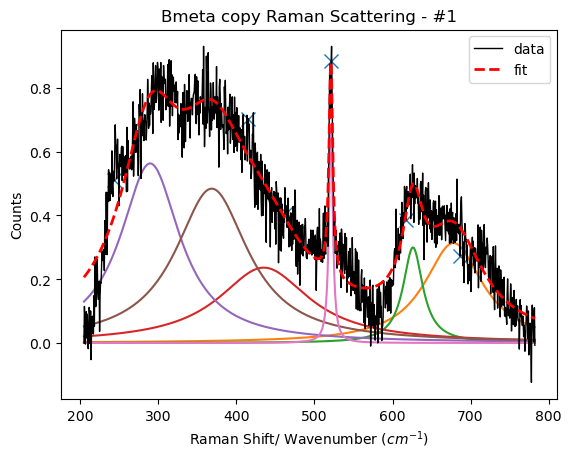

In [3]:
import glob, os
import numpy as np
import csv
from matplotlib import pyplot
import scipy.signal
from scipy.optimize import curve_fit
import peakutils
from lmfit.models import PseudoVoigtModel
import math
import traceback
from collections import OrderedDict 

path_to_folder = "test_data_to_start"
samples_to_analyse = ["meta copy"]


# def import_data(samples_to_analyse, path_to_folder=path_to_folder):
#     dict_container = OrderedDict()
#     for sample_id in samples_to_analyse:
#         dict_container[sample_id] = []
#     # print(dict_container)

#     for sample_id in samples_to_analyse:
#         path = path_to_folder + sample_id + "/*.txt"
#         # print(path)
#         for filepath in glob.glob(path):
#             # print(filepath)
#             data_from_file = np.genfromtxt(filepath)
#             dict_container[sample_id].append(data_from_file)
#     # print(np.shape(dict_container['21'][0]))  # First data set from sample B21 file 0
#     # print(np.shape(data_container['21'][1][:,0]))  # xs from file 1 of the sample B21
#     # print(np.shape(data_container['21'][0][:,1]))  # ys from file 0
#     return dict_container

def import_data(samples_to_analyse, path_to_folder=path_to_folder):
    dict_container = OrderedDict()
    for sample_id in samples_to_analyse:
        dict_container[sample_id] = []

    for sample_id in samples_to_analyse:
        path = os.path.join(path_to_folder, sample_id, "*.txt")  # Use os.path.join
        file_list = glob.glob(path)  # Get the list of matching files

        if not file_list:
            print(f"Warning: No files found for sample {sample_id} in {path}")

        for filepath in file_list:
            try:
                data_from_file = np.genfromtxt(filepath)
                dict_container[sample_id].append(data_from_file)
            except Exception as e:
                print(f"Error loading file {filepath}: {e}")

    return dict_container


# def gaussian(x, height, center, width, offset):
#     ##Not in use
#     return height*np.exp(-(x - center)**2/(2*width**2)) + offset

def lorentzian(x, amp, ctr, wid):
    return amp*wid**2/((x-ctr)**2+wid**2)

def func(x, *params):
    ''' *params of the form [center, amplitude, width ...] '''
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        ctr = params[i]
        amp = params[i+1]
        wid = params[i+2]
        # y = y + amp * np.exp( -((x - ctr)/wid)**2)
        y = y + lorentzian(x, amp, ctr, wid)
    return y

def fit_lorentzians(guess, func, x, y):
    # Uses scipy curve_fit to optimise the lorentzian fitting
    sigma = [2] * len(y)
    popt, pcov = curve_fit(func, x, y, p0=guess, maxfev=5000000, sigma=sigma)
    print('popt:', popt)
    fit = func(x, *popt)
    # pyplot.plot(x, y)
    # pyplot.plot(x, fit , 'r-')
    return (popt, fit)
    # pyplot.show()


# def find_peaks_peakutils(xs, ys, y_threshold=0.05, ys_min_separation=10, maxfev=20000, print=False):
#     # Obsolete, not used
#     indexes = peakutils.indexes(ys, thres=y_threshold, min_dist=ys_min_separation)  # Threshold is a percentage, min dist is minimum distance between peaks. I'm guessing it's in units of points, ie 3 points
#     peaks_x = peakutils.peak.interpolate(xs, ys, ind=indexes, width=2)
#     if(print):
#         print('*************PEAKUTILS**************')
#         print('Peak_pos= ', indexes, '\nPeaks= ', xs[indexes], ys[indexes])
#         print('peaks_x: ', peaks_x)
#         print('************************************')


#     # pyplot.plot(xs[indexes], ys[indexes], linestyle='', marker='x', markersize='12', color='blue') #Plot peaks
#     # plot vertical lines where peaks have been identified
#     for peak in peaks_x:
#         pyplot.axvline(x=peak, linestyle='--')

#     return peaks_x

# def remove_baseline(xs, ys, return_xs=False, degree=5): # Returns just ys unless otherwise specified
#     # Remove baseline with polynomial
#     y2 = ys + np.polyval([0.001,-0.08,degree], xs)
#     # y2 = ys
#     base = peakutils.baseline(y2, 2)
#     if return_xs:
#         return (xs, y2-base)
#     else:
#         return y2 -base

# def remove_baseline(xs, ys, return_xs=False, degree=5): # Returns just ys unless otherwise specified
#     # Remove baseline with polynomial
#     # y2 = ys + np.polyval([0.001,-0.08,degree], xs)
#     # # y2 = ys
#     # base = peakutils.baseline(y2, 2)
#     if return_xs:
#         return (xs, y2-base)
#     else:
#         return ys

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def find_peaks_scipy(xs, ys, widths=np.arange(1,50, 0.5)):
    # Not perfect but seems to find the most obscure ones, I use this one
    peaks = scipy.signal.find_peaks_cwt(ys, widths)#Problem
    # pyplot.plot(xs[peaks], ys[peaks], marker='+', linestyle='', markersize='12')
    print('*************PEAKSCIPY**************')
    print('From scipy: \nPeak_pos= ', peaks, '\nPeaks= ', xs[peaks], '\nIntensities= ',ys[peaks])
    print('************************************')

    return peaks 

# def find_peaks_sri(d, th):
#     # Too sensitive to noise - not used
#     '''
#     returns bool array with the same shape as `d` with elemets at the position of local maxima in `d` are set to `True`
#     this function simply checks if the neighbouring elements are smaller or equal and is __sensitive to noise__
#     '''
#     np.r_[True, d[1:] >= d[:-1]] & np.r_[d[:-1] > d[1:], True]

#     # th = 0 # use threshold of 0 mV for AP detection. the AP waveform is not very noise so the below works
#     V_maxima = (np.r_[True, d[1:] >= d[:-1]] & np.r_[d[:-1] > d[1:], True] & (d>th))
#     indices = V_maxima.nonzero()[0]

#     return indices

def get_highest_n_from_list(a, n):
    # Returns the highest peaks found by the peak finding algorithms
    return sorted(a, key=lambda pair: pair[1])[-n:]


def get_highest_n_peaks_scipy(xs, ys, n, th=0.25):
    smooth_indexes_scipy = find_peaks_scipy(xs, ys)
    ##take the highest 'n' smooth peaks 
    peak_indexes_xs_ys = np.asarray([list(a) for a in list(zip(xs[smooth_indexes_scipy], ys[smooth_indexes_scipy]))])
    return get_highest_n_from_list(peak_indexes_xs_ys, n)


def predict_and_plot_lorentzians(xs, ys, n_peaks_to_find=5):
    n_peaks = np.asarray(get_highest_n_peaks_scipy(xs, ys, n_peaks_to_find))

    pyplot.plot(n_peaks[:,0], n_peaks[:,1], ls='', marker='x', markersize=10) ##This is plotting the peak positions, the xs
    # pyplot.ylabel("Counts")
    # pyplot.xlabel("Raman Shift/ Wavenumber ($cm^{-1}$)")

    print(n_peaks)
    guess = []

    for idx, xs_ys in enumerate(n_peaks):
        guess.append(xs_ys[0]) #ctr
        guess.append(xs_ys[1]) #amp
        guess.append(10) #width ###This could be improved by estimating the width first for a better fit
    print('Fit Guess: ', guess)
    # guess.append(500); guess.append(0.25); guess.append(500) #Broad lorenztian

    
    params, fit = fit_lorentzians(guess, func, xs, ys) ###params is the array of gaussian stuff, fit is the y's of lorentzians

    return (params, fit, ys, n_peaks)
    
def r_value(ys, ys_fit):
    # Calculate the residuals
    residuals = ys - ys_fit

    # Calculate the total sum of squares (SST)
    sst = np.sum((ys - np.mean(ys))**2)

    # Calculate the residual sum of squares (SSR)
    ssr = np.sum(residuals**2)

    # Calculate R-squared
    r_squared = 1 - (ssr / sst)

    print(f"R-squared: {r_squared:.4f}")


def main_predict_fit():
    # The following code runs through each repeated measurement from all of the samples
    # and attempts to fit lorentzians to the data.
    dict_container = import_data(samples_to_analyse) #global variable at present
    # print(dict_container)

    # print(np.shape(dict_container['21'][0]))#this is the first one etc

    ###THIS CODE GOES THROUGH ALL THE DATA 
    for sample_id, sample_data in dict_container.items(): # 21, 22 etc
        # print(sample_data)
        for idx, data_set in enumerate(sample_data):
            xs = data_set[:,0]
            ys = data_set[:,1]
            # data_set[:,1] = remove_baseline(xs, data_set[:,1])
#            data_set[:,1] = 9.5*data_set[:,1]/np.max(data_set[:,1])
            # pyplot.figure(figsize=(8,6))
            pyplot.title("B" + sample_id + " Raman Scattering - #" + str(idx+1))

            try:
                params, fit, ys, n_peaks = predict_and_plot_lorentzians(xs,ys, 6) # 5 = number of peaks to fit to ##Returns modified ys for y axis scaling
                for j in range(0, len(params), 3): 
                    ctr = params[j] 
                    amp = params[j+1]
                    width = params[j+2]
                    pyplot.plot(xs, lorentzian(xs, amp, ctr, width), ls='-')
                pyplot.plot(xs,ys, lw=1, label='data', c='black')
                pyplot.plot(xs, fit, 'r-', label='fit', c='red', lw=2, ls='--')
                pyplot.legend()
                pyplot.ylabel("Counts")
                pyplot.xlabel("Raman Shift/ Wavenumber ($cm^{-1}$)")

            except RuntimeError:
                print(traceback.format_exc())
                pyplot.plot(xs,ys, lw=1, label='data- no fit found', c='black')

                pyplot.legend()
                pyplot.ylabel("Counts")
                pyplot.xlabel("Raman Shift/ Wavenumber ($cm^{-1}$)")


            print('n_peaks: ', n_peaks)

    r_value(ys, fit)
    pyplot.show()


# ##Removes baseline of each individually and plots and fits to the sample averages
# def main_predict_fit_averages():

#     dict_container = import_data(samples_to_analyse) #global variable at present

#     # print(np.shape(dict_container['21'][0]))#this is the first one etc

#     ###THIS CODE GOES THROUGH ALL THE DATA 
#     for sample_id, sample_data in dict_container.items():#21, 22 etc



#         # print(sample_data)
#         pyplot.figure(figsize=(8,6))
#         pyplot.title("B " + sample_id + " Raman Scattering")
#         ##should remove the baseline of each here

#         for idx, data_set in enumerate(sample_data):
#             xs = data_set[:,0]
#             ys = data_set[:,1]
#             data_set[:,1] = remove_baseline(xs, data_set[:,1])
#             data_set[:,1] = 9.5*data_set[:,1]/np.max(data_set[:,1]) ##Make intensity arbitrary units (normalise)
#             ys = data_set[:,1]
            

#             # pyplot.plot(xs, ys,  linestyle='--') #Plot individual lines

#         xs0 = sample_data[0][:,0]
#         avg = np.average(sample_data, axis = 0)

#         try:
#             params, fit, ys , _ = predict_and_plot_lorentzians(avg[:,0], avg[:,1], 4) #5 = number of peaks to fit to ##Returns modified ys for y axis scaling
#             for j in range(0, len(params), 3): 
#                     ctr = params[j] 
#                     amp = params[j+1]
#                     width = params[j+2]
#                     pyplot.plot(avg[:,0], lorentzian(avg[:,0], amp, ctr, width), ls='-')
#             pyplot.plot(avg[:,0],ys, lw=1, label='data', c='blue')
#             pyplot.plot(avg[:,0], fit, 'r-', label='fit', c='red', lw=2, ls='--')
#             pyplot.ylabel("Counts")
#             pyplot.xlabel("Raman Shift/ Wavenumber ($cm^{-1}$)")
#             pyplot.legend()
#         except RuntimeError:
#             print(traceback.format_exc())
#             pyplot.plot(avg[:,0],ys, lw=1, label='data- no fit found', c='black')
#             pyplot.legend()
#             pyplot.ylabel("Counts")
#             pyplot.xlabel("Raman Shift/ Wavenumber ($cm^{-1}$)")

#         pyplot.plot(avg[:,0], avg[:,1], label = 'average', c='black')##plots the average
#         pyplot.ylabel("Counts")
#         pyplot.xlabel("Raman Shift/ Wavenumber ($cm^{-1}$)")
#         pyplot.legend()

#     pyplot.show()


if __name__ == "__main__":
    main_predict_fit()
    # main_predict_fit_averages()
    # main_demo()
